In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/ilker/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ilker/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/ilker/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/ilker/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/home/ilke

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/ilker/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/ilker/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/ilker/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/ilker/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/home/ilke

AttributeError: _ARRAY_API not found

In [2]:


def rewrite_geant4_csv_header(input_path, output_path):
    with open(input_path, 'r') as infile:
        lines = infile.readlines()

    # Extract column names from metadata
    column_names = []
    data_start_index = 0
    for i, line in enumerate(lines):
        if line.startswith("#column"):
            match = re.match(r"#column\s+\w+\s+(\w+)", line)
            if match:
                column_names.append(match.group(1))
        elif not line.startswith("#"):
            data_start_index = i
            break

    # Write new file with standard header
    with open(output_path, 'w') as outfile:
        outfile.write(",".join(column_names) + "\n")  # new header
        for line in lines[data_start_index:]:
            outfile.write(line)

def Getinfo(f1,f2):
    rewrite_geant4_csv_header(f1,f2)
    return pd.read_csv(f2)

    


In [3]:
Folder="build_G4Opticks"
G4Result=Getinfo(f"../{Folder}/out_nt_Geant4Hits_t0.csv", "Geant4Hits_clean.csv")
OptResult=Getinfo(f"../{Folder}/out_nt_OpticksHits_t0.csv", "OpticksHits_clean.csv")
PhotonInfo=Getinfo(f"../{Folder}/out_nt_PhotonInfo_t0.csv", "PhotonInfo_clean.csv")



In [4]:
print(len(OptResult['z']))
print(len(G4Result['z']))

2931813
3684192


In [5]:
#G4
#evtID,SensorID,SensorName,x,y,z,t,wavelength,ProcessID

#Opticks
#evtID,hit_Id,SensorID,x,y,z,t,wavelength

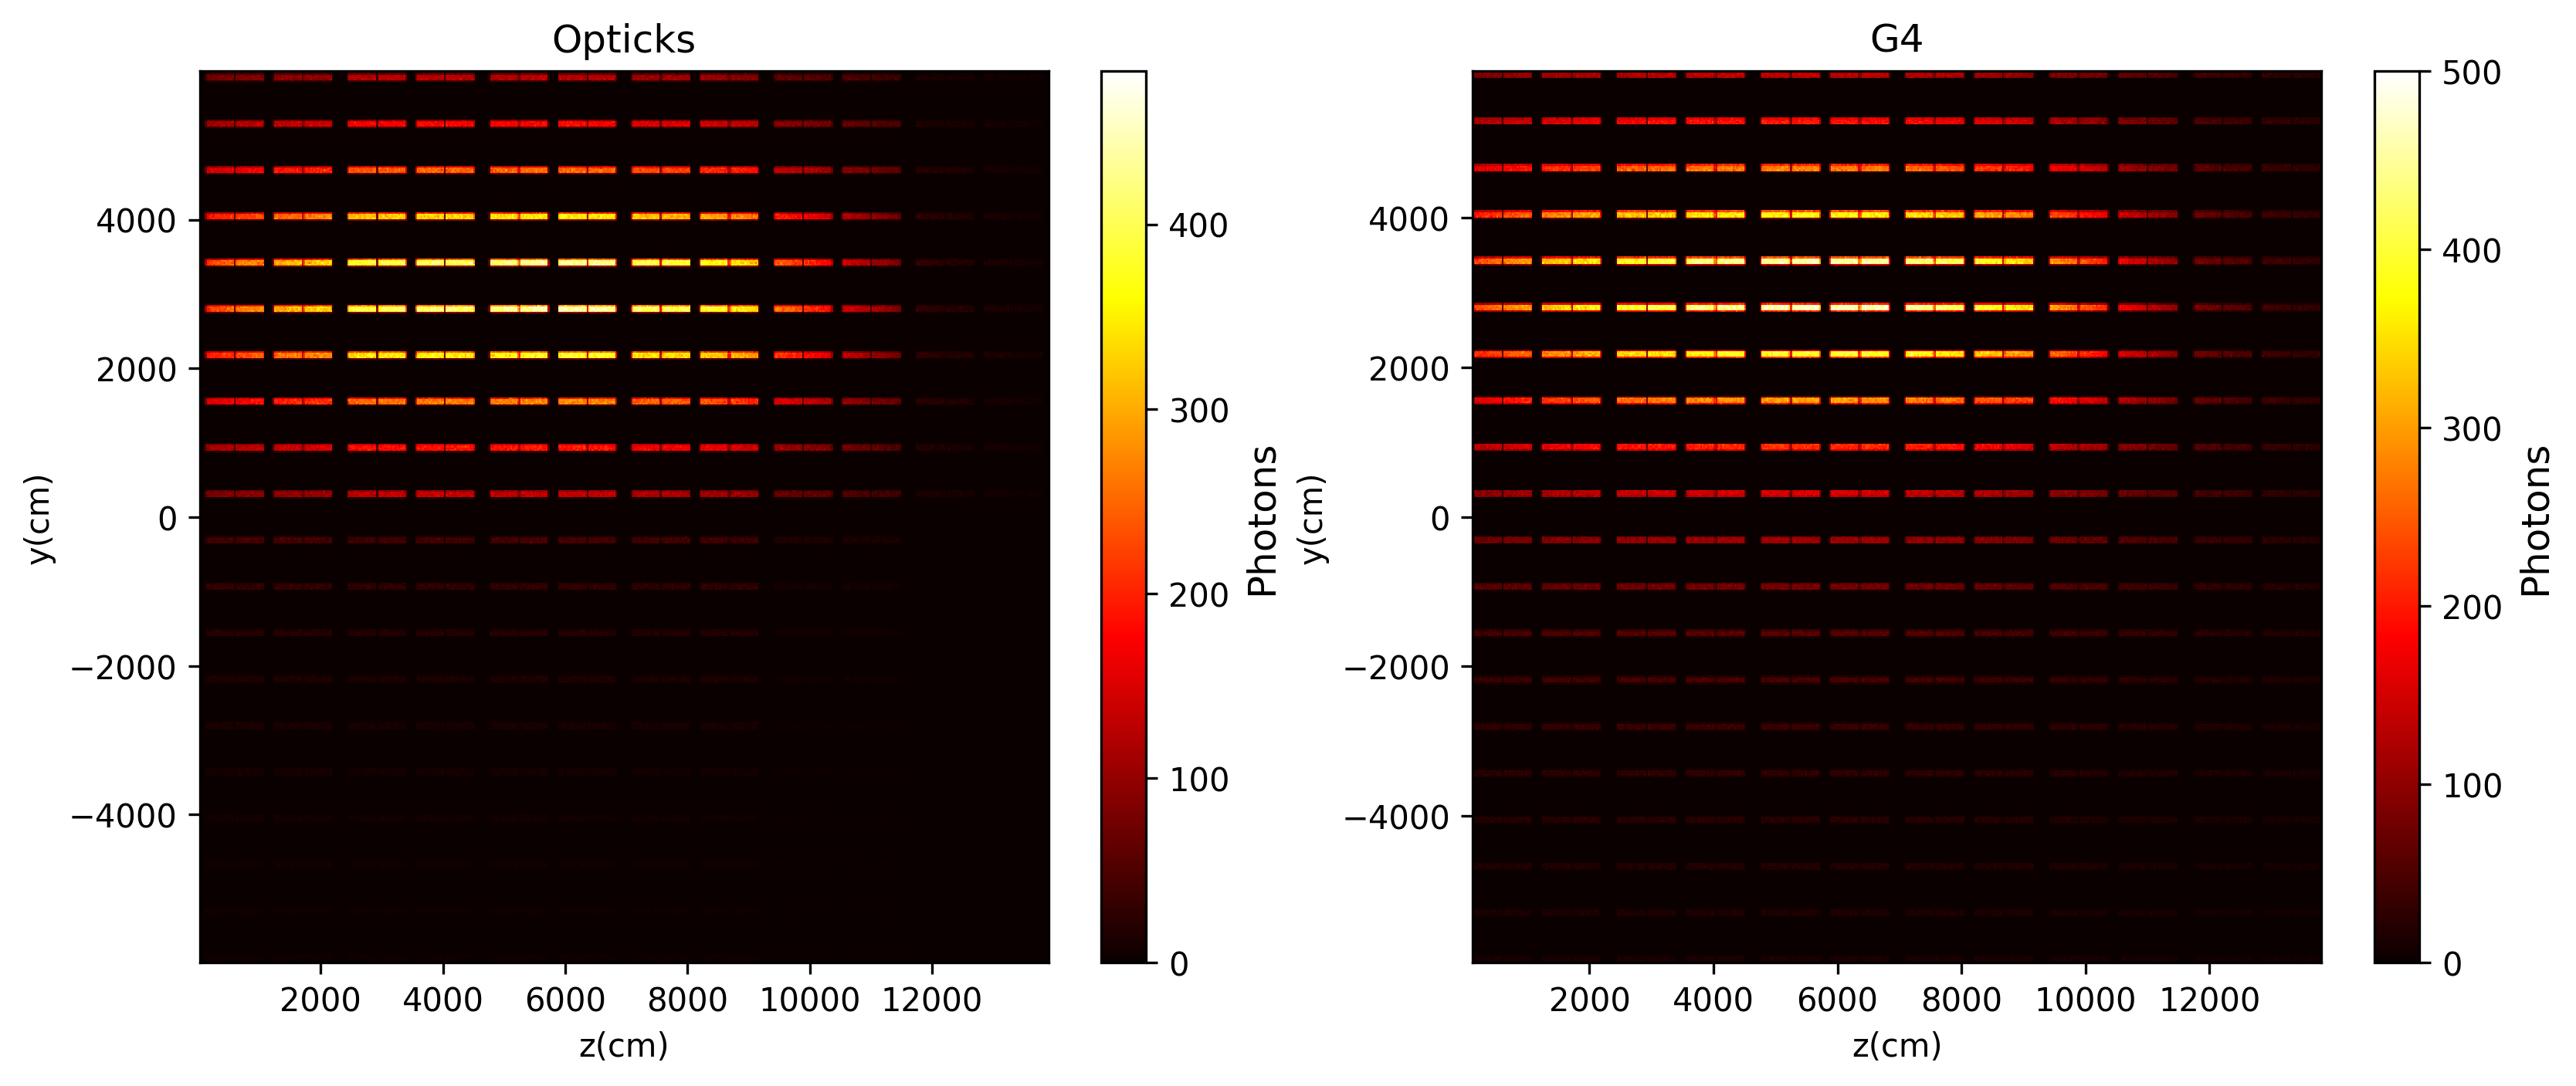

In [17]:
c=500
fig,p=plt.subplots(1,2,dpi=300,figsize=(13,5))
p[0].set_title("Opticks")
h1=p[0].hist2d(OptResult['z'],OptResult['y'],bins=500,cmin=0,cmax=c,cmap="hot",label="Opticks")
cbar1=fig.colorbar(h1[3])
cbar1.set_label("Photons", fontsize=12)
p[1].set_title("G4")
h2=p[1].hist2d(G4Result['z'],G4Result['y'],bins=500,cmin=0,cmax=c,cmap="hot",label="Geant4")
cbar2=fig.colorbar(h2[3])
cbar2.set_label("Photons", fontsize=12)
for i in range(0,2):
    p[i].set_xlabel("z(cm)")
    p[i].set_ylabel("y(cm)")


In [7]:
np.mean(G4Result['t'])

np.float64(122.63837204472523)

/tmp/ilker/opticks/ipykernel_26966/3599876128.py:5: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  fig.legend()
/tmp/ilker/opticks/ipykernel_26966/3599876128.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend()


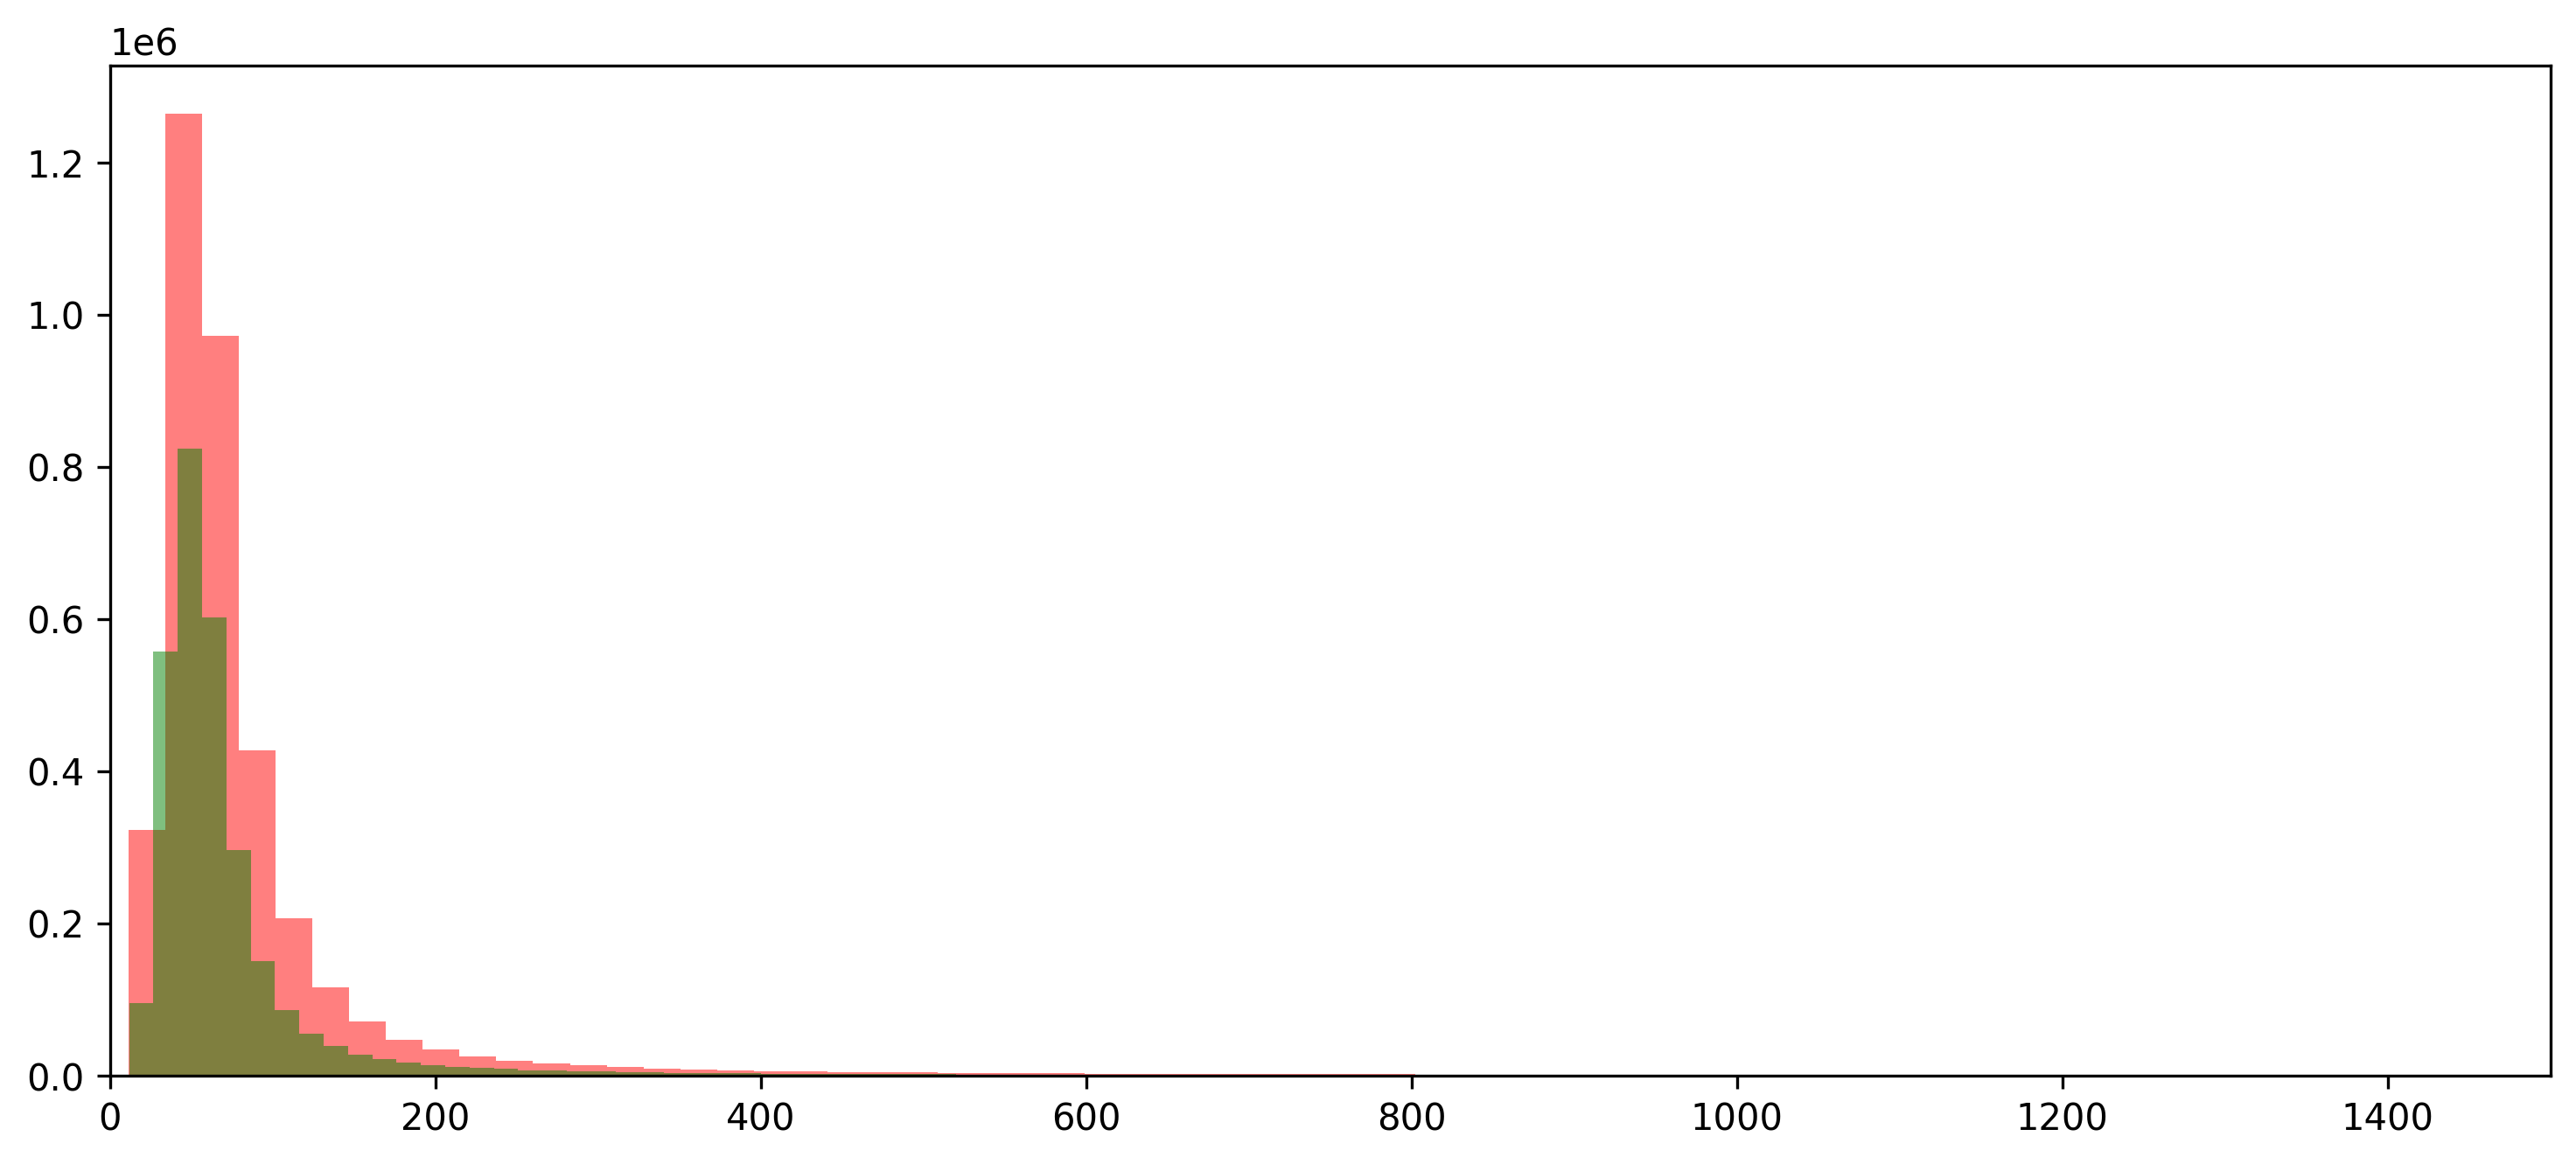

In [14]:
plt.figure(dpi=300,figsize=(12,5))
plt.hist(G4Result['t'],bins=1000,label="G4",color="red",alpha=0.5)
plt.hist(OptResult['t'],bins=1000,label="Opticks",color="green",alpha=0.5)
plt.xlim(0,1500)
fig.legend()

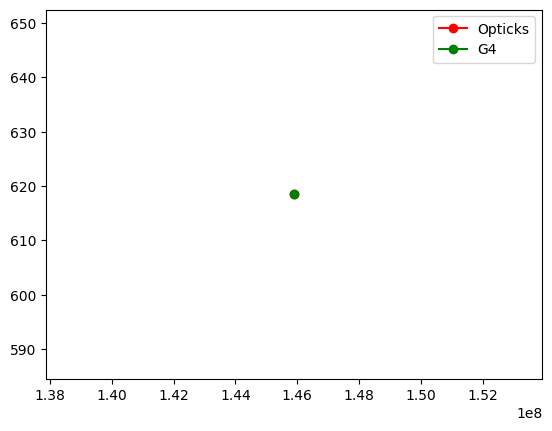

In [9]:
plt.plot(PhotonInfo["OScintPhotons"],PhotonInfo["Time"],color="red",linestyle='-',marker='o',label="Opticks")
plt.plot(PhotonInfo["G4ScintPhotons"],PhotonInfo["Time"],color="green",linestyle='-',marker='o',label="G4")
plt.legend()
plt.show()

In [10]:
print(PhotonInfo)

   G4ScintPhotons  G4CernPhotons  OScintPhotons  OCerenkovPhotons     Time  \
0       145905689              0      145905689                 0  618.475   

   eventID  
0        0  


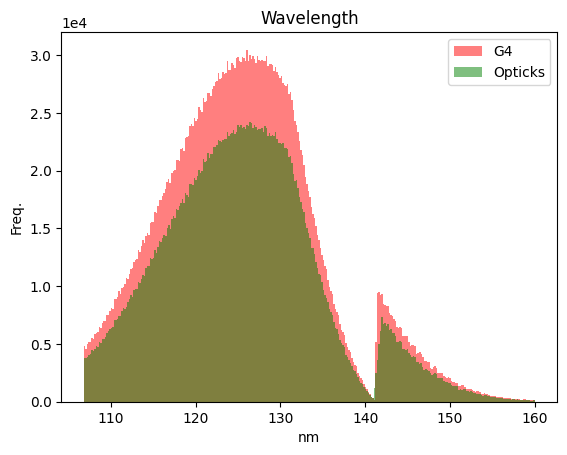

In [11]:

plt.title("Wavelength")
plt.hist(G4Result['wavelength'],bins=300,label="G4",color="red",alpha=0.5)
plt.hist(OptResult['wavelength'],bins=300,label="Opticks",color="green",alpha=0.5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel("nm")
plt.ylabel("Freq.")
plt.legend()